# softmax


In [1]:
import networks
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

In [2]:
# load datasets

data_dir = Path("data")
easy_train = pd.read_csv(data_dir / "classification" / "easy-training.csv")
easy_test = pd.read_csv(data_dir / "classification" / "easy-test.csv")
rings_train = pd.read_csv(data_dir / "classification" / "rings3-regular-training.csv")
rings_test = pd.read_csv(data_dir / "classification" / "rings3-regular-test.csv")
xor_train = pd.read_csv(data_dir / "classification" / "xor3-training.csv")
xor_test = pd.read_csv(data_dir / "classification" / "xor3-test.csv")

# easy dataset

In [3]:
easy_train

,x,y,c
0,-72.829461,-40.239391,False
1,-65.464396,-60.501516,False
2,14.389589,74.223994,False
3,-92.335628,17.466916,False
4,-61.058421,-16.761820,False
...,...,...,...
495,96.279863,-95.125533,True
496,-41.625338,-48.713720,True
497,-64.545443,-91.317035,True
498,-27.066599,-89.894718,True


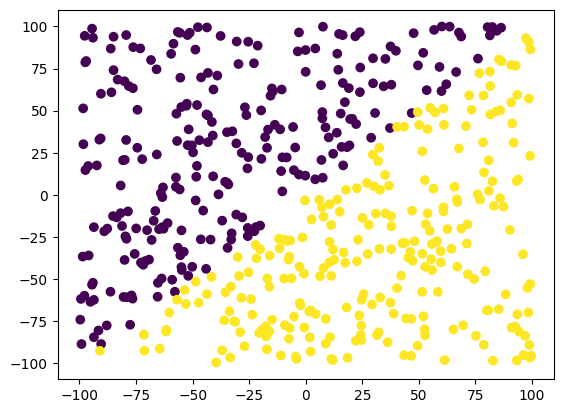

In [4]:
plt.scatter(easy_train.x, easy_train.y, c=easy_train.c)

In [5]:
layers = [
    #{"output_dim": 5, "activation": "relu", "init": "he"},
    # {"output_dim": 2, "activation": "softmax", "init": "normal"}
    {"output_dim": 1, "activation": "sigmoid", "init": "normal"}
]

mlp = networks.MLP(layers, input=easy_test[["x", "y"]].T, output_type="classification")


initializing layer 0 using normal initialization


In [6]:
norm = networks.assets.Normalizator(easy_train[["x", "y"]])

train = norm(easy_train[["x", "y"]])
y_train = easy_train.c.values.reshape(-1, 1)
test = norm(easy_test[['x', 'y']])
y_test = easy_test.c.values.reshape(-1, 1)

In [7]:
max_epochs = 500

initializing layer 0 using normal initialization
Epoch: 0, Loss: 0.7706110676865562
Epoch: 100, Loss: 0.12164466293875756
Epoch: 200, Loss: 0.09723835113664846
Epoch: 300, Loss: 0.0850697351806209
Epoch: 400, Loss: 0.0772777843682016
Epoch: 500, Loss: 0.0716818402409483
Epoch: 600, Loss: 0.06738592012956937
Epoch: 700, Loss: 0.06394032516333516
Epoch: 800, Loss: 0.06108951182399256
Epoch: 900, Loss: 0.05867534625641794
Epoch: 1000, Loss: 0.05659367641229267
Epoch: 1100, Loss: 0.054772553166702286
Epoch: 1200, Loss: 0.053160363553022734


Epoch: 1300, Loss: 0.051718933071713616
Epoch: 1400, Loss: 0.050419302779798385
Epoch: 1500, Loss: 0.04923903134941767
Epoch: 1600, Loss: 0.04816040881286352
Epoch: 1700, Loss: 0.04716923753152396
Epoch: 1800, Loss: 0.046253978290247445
Epoch: 1900, Loss: 0.045405138433870916
Epoch: 2000, Loss: 0.04461482462006108
Epoch: 2100, Loss: 0.04387641008680586
Epoch: 2200, Loss: 0.043184283191466735
Epoch: 2300, Loss: 0.04253365467232396
Epoch: 2400, Loss: 0.041920408027336965
Epoch: 2500, Loss: 0.041340982015017715
Epoch: 2600, Loss: 0.04079227740611637
Epoch: 2700, Loss: 0.0402715822640356
Epoch: 2800, Loss: 0.03977651154076412
Epoch: 2900, Loss: 0.039304957846237554
Epoch: 3000, Loss: 0.038855051019562444
Epoch: 3100, Loss: 0.038425124695487325
Epoch: 3200, Loss: 0.038013688475443695
Epoch: 3300, Loss: 0.03761940462237549
Epoch: 3400, Loss: 0.03724106843237084
Epoch: 3500, Loss: 0.03687759161557609
Epoch: 3600, Loss: 0.03652798815417293
Epoch: 3700, Loss: 0.036191362211281705
Epoch: 3800, L

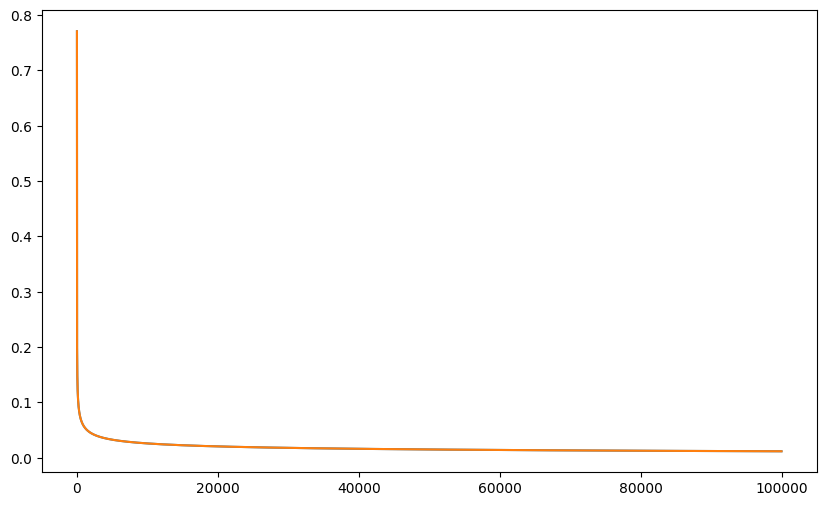

In [20]:
layers = [
    #{"output_dim": 10, "activation": "relu", "init": "he"},
    {"output_dim": 2, "activation": "softmax", "init": "normal"}
]

max_epochs = 100000

mlp = networks.MLP(layers, input=train.T, output_type="classification")

losses = mlp.train(train.T.to_numpy(), y_train.T, learning_rate=0.5, max_epochs=max_epochs, batch_size=10000)


plt.plot(losses)

loss: 0.011766653359064879


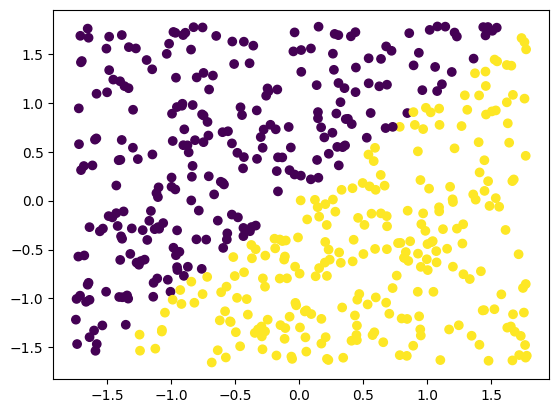

In [21]:
y_hat = mlp.predict(train.T)
print("loss:", mlp.calculate_loss(train.T, y_train.T))

plt.scatter(train.x, train.y, c=y_hat)

In [22]:
y_pred = mlp.full_forward_pass(test.T)
y_test_onehot = networks.assets.one_hot(y_test.T, 2)

print("Fscore on test set:", mlp.Fscore(y_pred, y_test_onehot))


Fscore on test set: 0.9903414102090987


## rings3 

In [41]:
rings_train.c.value_counts()

c
0    500
1    500
2    500
Name: count, dtype: int64

In [42]:
rings_train

,x,y,c
0,-93.563317,-76.345110,0
1,1.060114,-16.727040,0
2,24.396099,40.358822,0
3,-94.595137,-97.889250,0
4,-85.331382,-56.736933,0
...,...,...,...
1495,-3.227585,-69.846357,2
1496,-82.598085,-51.758017,2
1497,-46.601078,-21.654871,2
1498,-59.106450,-44.528442,2


In [46]:
layers = [
    {"output_dim": 10, "activation": "relu", "init": "he"},
    {"output_dim": 10, "activation": "relu", "init": "he"},
    {"output_dim": 3, "activation": "softmax", "init": "normal"}
]


norm = networks.assets.Normalizator(rings_train[["x", "y"]])

train = norm(rings_train[["x", "y"]])
y_train = rings_train.c.values.reshape(-1, 1)
test = norm(rings_test[['x', 'y']])
y_test = rings_test.c.values.reshape(-1, 1)

initializing layer 0 using he initialization
initializing layer 1 using he initialization
initializing layer 2 using normal initialization
Epoch: 0, Loss: 4.033273780489
Epoch: 100, Loss: 0.7495143169838973
Epoch: 200, Loss: 0.6184378251822982
Epoch: 300, Loss: 0.539821925709632
Epoch: 400, Loss: 0.4745640481832848
Epoch: 500, Loss: 0.42617731072696763
Epoch: 600, Loss: 0.38733716503757265
Epoch: 700, Loss: 0.3563479110653765
Epoch: 800, Loss: 0.3313352595051833
Epoch: 900, Loss: 0.31071286726140807
Epoch: 1000, Loss: 0.2932185653271576
Epoch: 1100, Loss: 0.27859131997553216
Epoch: 1200, Loss: 0.26586185535494217
Epoch: 1300, Loss: 0.25537526255157167
Epoch: 1400, Loss: 0.2463688793151241
Epoch: 1500, Loss: 0.23869534093354028
Epoch: 1600, Loss: 0.23200922624969333
Epoch: 1700, Loss: 0.22613152363387232
Epoch: 1800, Loss: 0.2209324376415365
Epoch: 1900, Loss: 0.216240721650678
Epoch: 2000, Loss: 0.21196549702806697
Epoch: 2100, Loss: 0.2080141504559536
Epoch: 2200, Loss: 0.204443502718

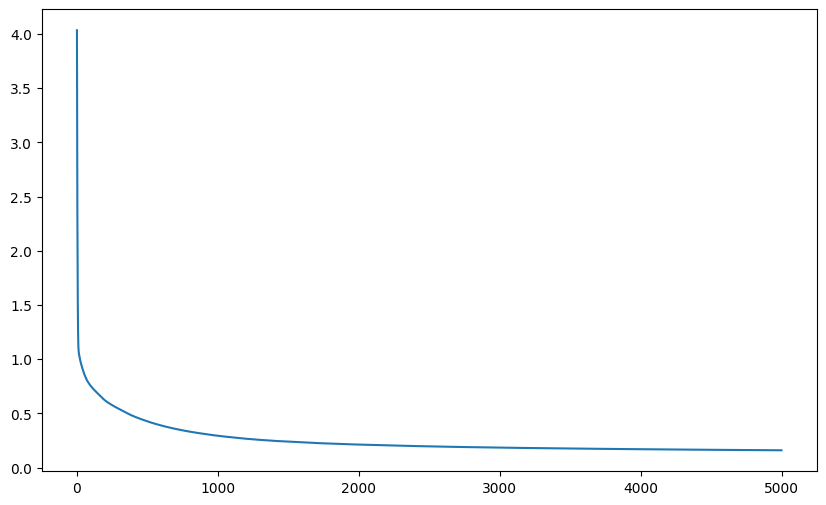

In [70]:
mlp_steps = networks.MLP(layers, input=train.T.to_numpy(), output_type="classification")

max_epochs = 5000

losses = mlp_steps.train(train.T.to_numpy(), y_train.T, learning_rate=0.001, max_epochs=max_epochs, batch_size=32)

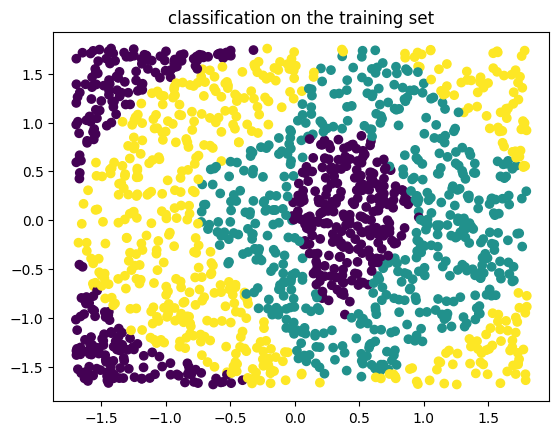

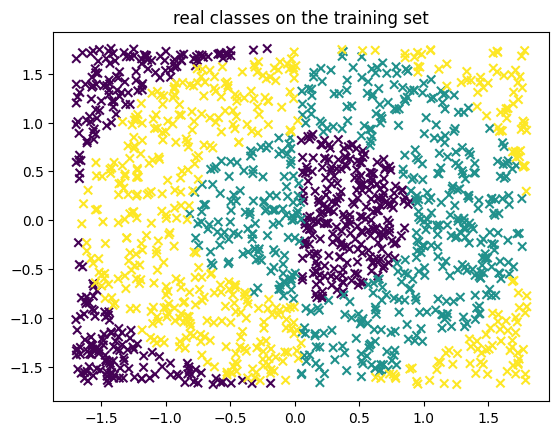

In [71]:
y_hat = mlp_steps.predict(train.T)
plt.scatter(train.x, train.y, c=y_hat)
plt.title("classification on the training set")
plt.show()

plt.scatter(train.x, train.y, c=rings_train.c, marker="x")
plt.title("real classes on the training set")
plt.show()

In [73]:
y_pred = mlp_steps.full_forward_pass(test.T)
print(y_pred.shape)
y_onehot = networks.assets.one_hot(y_test.T, 3)
print("Fscore on test set:", mlp_steps.Fscore(y_pred, y_onehot))

Fscore on test set: 0.8783382313857144


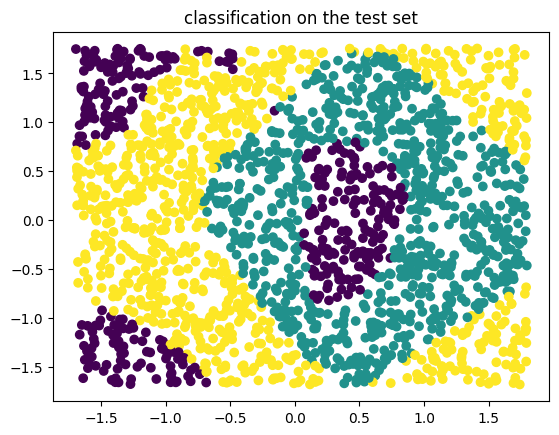

Text(0.5, 1.0, 'real classes on the test set')

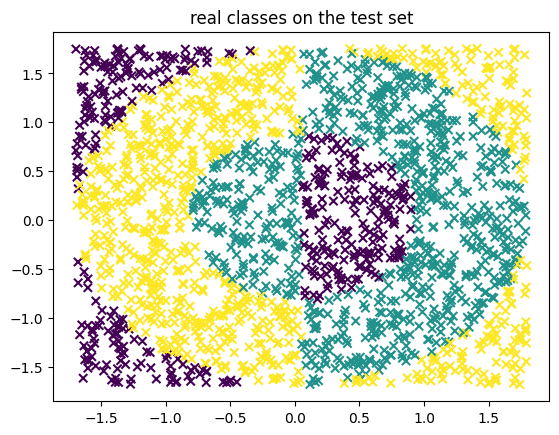

In [64]:


y_pred = mlp_steps.predict(test.T).flatten()
plt.scatter(test.x, test.y, c=y_pred)
plt.title("classification on the test set")
plt.show()

plt.scatter(test.x, test.y, c=rings_test.c, marker="x")
plt.title("real classes on the test set")


# XOR

In [36]:
xor_train

,x,y,c
0,-5.720316,18.198653,0
1,50.039419,-71.390360,0
2,93.072781,-76.340256,0
3,10.434100,-21.863272,0
4,30.198218,-24.730234,0
...,...,...,...
495,-88.821359,14.624647,1
496,57.830467,12.097832,1
497,-31.530983,90.372797,1
498,-17.008097,65.769246,1


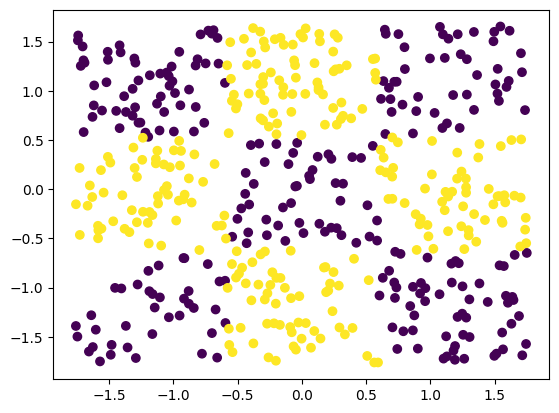

In [37]:

norm = networks.assets.Normalizator(xor_train[["x", "y"]])

train = norm(xor_train[["x", "y"]])
y_train = xor_train.c.values.reshape(-1, 1)
test = norm(xor_test[['x', 'y']])
y_test = xor_test.c.values.reshape(-1, 1)

plt.scatter(train["x"], train["y"], c=y_train)

initializing layer 0 using he initialization
initializing layer 1 using he initialization
initializing layer 2 using normal initialization
Epoch: 0, Loss: 0.9050848516567307
Epoch: 100, Loss: 0.3108628468439342
Epoch: 200, Loss: 0.2083489298299113
Epoch: 300, Loss: 0.1553219980351957
Epoch: 400, Loss: 0.12824520055980304
Epoch: 500, Loss: 0.11080581593960653
Epoch: 600, Loss: 0.09851581887323686
Epoch: 700, Loss: 0.08936709957815231
Epoch: 800, Loss: 0.08145680481720176
Epoch: 900, Loss: 0.07514388665937526
Epoch: 1000, Loss: 0.07026186406970523
Epoch: 1100, Loss: 0.06505315420706771
Epoch: 1200, Loss: 0.06145165832512051
Epoch: 1300, Loss: 0.05813617149363483
Epoch: 1400, Loss: 0.05563050628940658
Epoch: 1500, Loss: 0.05264111385264243
Epoch: 1600, Loss: 0.050152029601588016
Epoch: 1700, Loss: 0.047937881619756394
Epoch: 1800, Loss: 0.046132764327625794
Epoch: 1900, Loss: 0.04424589202243115
Epoch: 2000, Loss: 0.04251876601370369
Epoch: 2100, Loss: 0.04082661184087767
Epoch: 2200, Los

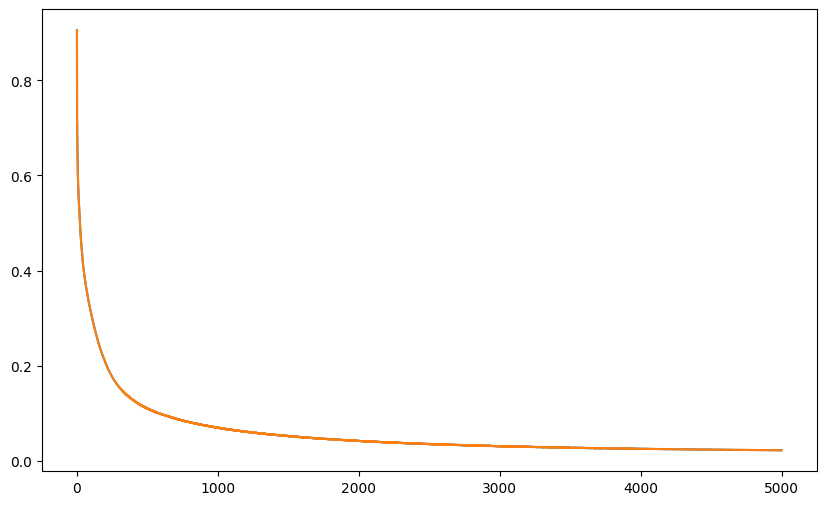

In [71]:
layers = [
    {"output_dim": 10, "activation": "relu", "init": "he"},
    {"output_dim": 10, "activation": "relu", "init": "he"},
    {"output_dim": 2, "activation": "softmax", "init": "normal"}
]

max_epochs = 5000

mlp_xor = networks.MLP(layers, input=train.T, output_type="classification")


losses = mlp_xor.train(train.T, y_train.T, max_epochs=max_epochs, batch_size=32, learning_rate=0.01)

plt.plot(losses)

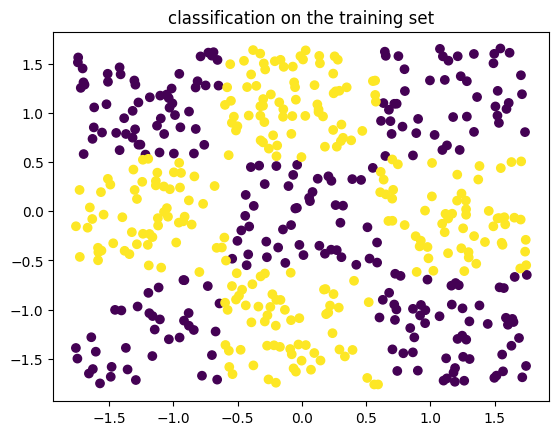

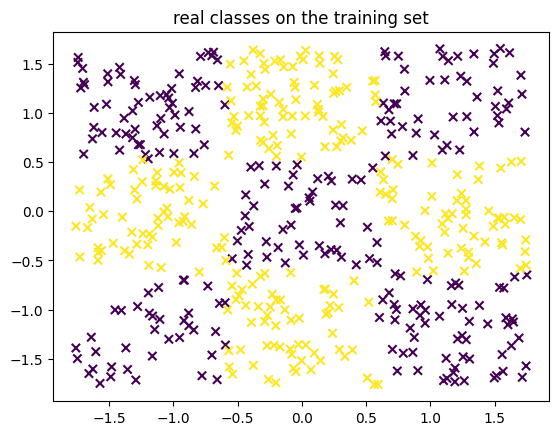

In [74]:
y_hat = mlp_xor.predict(train.T)
plt.scatter(train.x, train.y, c=y_hat)
plt.title("classification on the training set")
plt.show()

plt.scatter(train.x, train.y, c=y_train, marker="x")
plt.title("real classes on the training set")
plt.show()

4

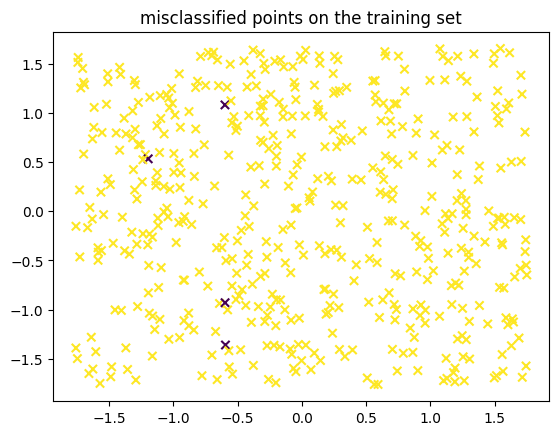

In [75]:
plt.title("misclassified points on the training set")

plt.scatter(train.x, train.y, c=y_hat.flatten() == y_train.flatten(), marker="x")
np.sum(y_hat.flatten() != y_train.flatten())

In [76]:
y_pred.shape

(2, 500)

In [77]:
y_pred = mlp_xor.full_forward_pass(test.T)
print(y_pred.shape)
y_onehot = networks.assets.one_hot(y_test.T, 2)
print("Fscore on test set:", mlp_xor.Fscore(y_pred, y_onehot))

(2, 500)
Fscore on test set: 0.942810066716542


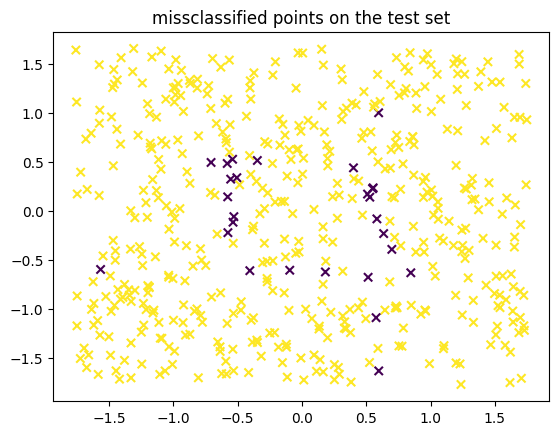

In [17]:
y_pred = mlp_xor.predict(test.T).flatten()
y_test = y_test.flatten()

plt.title("missclassified points on the test set")
plt.scatter(test.x, test.y, c=y_pred == y_test, marker="x")